### Line Segmentation from 
https://github.com/computervisionpro/yt/blob/main/line-text-segmentation/tutorial20.ipynb

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

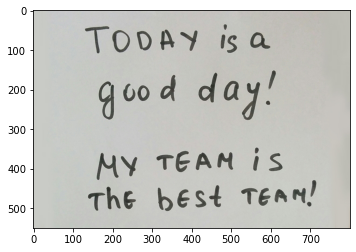

In [2]:
img = cv2.imread('text.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape

if w > 1000:
    
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
plt.imshow(img);



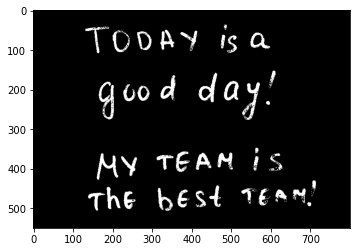

In [3]:
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img);


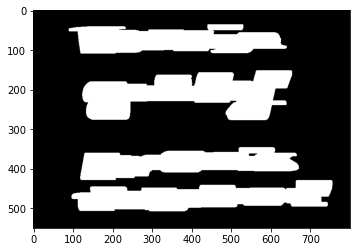

In [4]:
#dilation
kernel = np.ones((3,85), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray');


In [5]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)

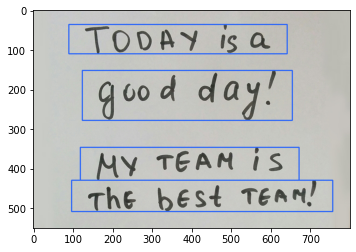

In [6]:
img2 = img.copy()

for ctr in sorted_contours_lines:
    
    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)
    
plt.imshow(img2);


### Try word segmentation from same Github code

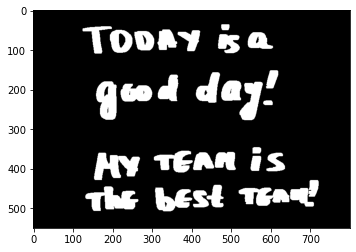

In [7]:
#dilation
kernel = np.ones((3,15), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray');


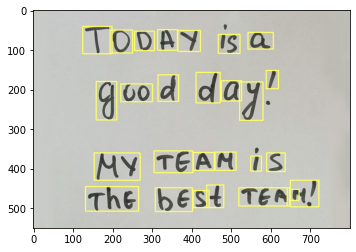

In [8]:
img3 = img.copy()
words_list = []

for line in sorted_contours_lines:
    
    # roi of each line
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y+w, x:x+w]
    
    # draw contours on each word
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])
    
    for word in sorted_contour_words:
        
        if cv2.contourArea(word) < 400:
            continue
        
        x2, y2, w2, h2 = cv2.boundingRect(word)
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (255,255,100),2)
        
plt.imshow(img3);


### Try char segment using code from:
https://pyimagesearch.com/2020/08/24/ocr-handwriting-recognition-with-opencv-keras-and-tensorflow/

number of char in image: 25


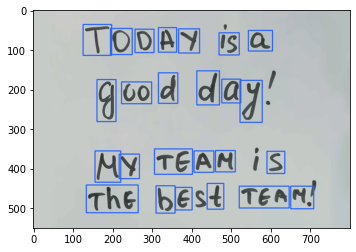

In [9]:
import cv2
#x,y,w,h = cv2.boundingRect(sorted_contours_lines[1])
#image = img2[y:y+h,x:x+w,:]
image = cv2.imread("text.png") 
image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

res,thresh = cv2.threshold(gray,150,255,cv2.THRESH_BINARY_INV) #threshold 
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)) 

dilated = cv2.dilate(thresh,kernel,iterations = 5) 

contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) 

coord = []
for contour in contours:  
    [x,y,w,h] = cv2.boundingRect(contour)   
    if h>300 and w>300:   
        continue   
    if h<40 or w<40:   
        continue  
    coord.append((x,y,w,h)) 

coord.sort(key=lambda tup:tup[0]) # if the image has only one sentence sort in one axis

count = 0
for cor in coord:
    [x,y,w,h] = cor
    t = image[y:y+h,x:x+w,:]
    #uncomment to generate pngs
    #cv2.imwrite(str(count)+".png",t)
    count += 1
print("number of char in image:", count)

for cor in coord:
    
    x,y,w,h = cor
    cv2.rectangle(image, (x,y), (x+w, y+h), (40, 100, 250), 2)
    
plt.imshow(image);